In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import models as md
#sns.set()

## Response angle for noiseless, stationary model

In [2]:
def stationary_response_angle(vt, el, rm, rho_null, c_scale, c_rho, m, b):
    resp_angle = (vt - el + rho_null)/(c_scale * m * (rm - c_rho)) - b/m
    return resp_angle

## Response angle for noisy, stationary model

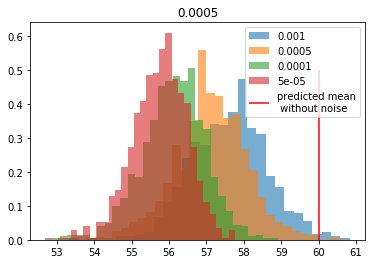

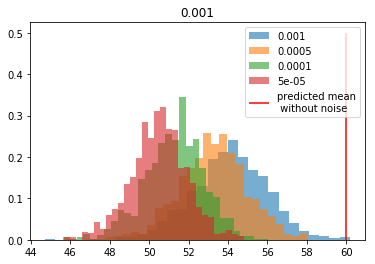

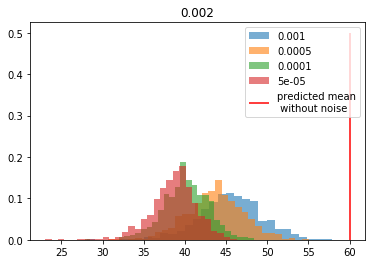

In [3]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.000,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 0*1e-3,
          'noise_std_inh': 0*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

std_vals = [0.0005, 0.001, 0.002]
dt_vals = [0.001, 0.0005, 0.0001, 0.00005]
mean_resp_angle = np.zeros((len(std_vals), len(dt_vals)))
for vt_idx, vt_std in enumerate(std_vals):
    plt.figure()
    params['vt_std'] = vt_std
    for dt_idx, dt_val in enumerate(dt_vals):
        params['dt'] = dt_val
        nruns = 1000
        rstims = np.zeros(nruns)
        rdists = np.zeros(nruns)
        reaction_times = np.zeros(nruns)
        speeds = np.zeros(nruns)
        for i in np.arange(nruns):
            rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)

        analytical_resp_angle = stationary_response_angle(params['v_t'], params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                           params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                           params['b'])
        mean_resp_angle[vt_idx, dt_idx] = np.mean(rstims)

        plt.hist(rstims, bins=30, label=str(dt_val), density=True, alpha=0.6)
    
    plt.vlines(analytical_resp_angle, 0, 0.5, 'r', label='predicted mean\n without noise')
    plt.title(str(vt_std))
    plt.legend()

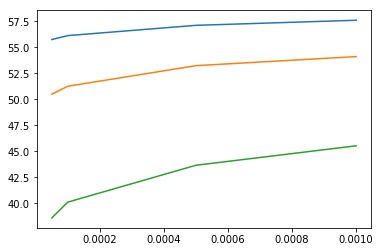

In [4]:
plt.plot(dt_vals, mean_resp_angle.T)

## Effect of dt on membrane noise

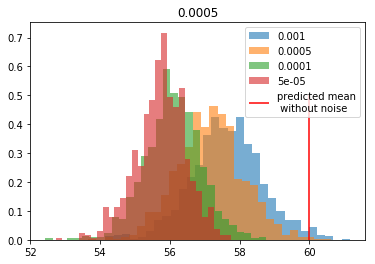

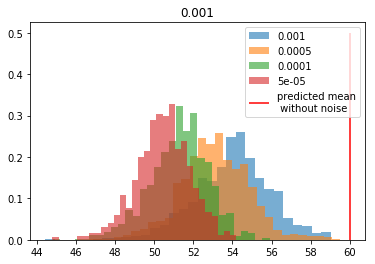

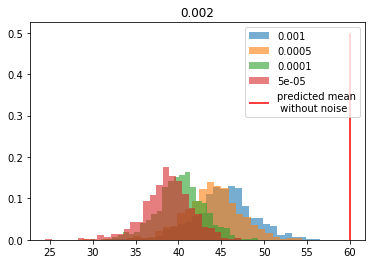

In [10]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.000,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 0*1e-3,
          'noise_std_inh': 0*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

std_vals = [0.0005, 0.001, 0.002]
dt_vals = [0.001, 0.0005, 0.0001, 0.00005]
mean_resp_angle = np.zeros((len(std_vals), len(dt_vals)))
var_resp_angle = np.zeros((len(std_vals), len(dt_vals)))
for exc_idx, exc_std in enumerate(std_vals):
    plt.figure()
    params['noise_std_exc'] = exc_std
    for dt_idx, dt_val in enumerate(dt_vals):
        params['dt'] = dt_val
        nruns = 1000
        rstims = np.zeros(nruns)
        rdists = np.zeros(nruns)
        reaction_times = np.zeros(nruns)
        speeds = np.zeros(nruns)
        for i in np.arange(nruns):
            rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)

        analytical_resp_angle = stationary_response_angle(params['v_t'], params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                           params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                           params['b'])
        mean_resp_angle[exc_idx, dt_idx] = np.mean(rstims)
        var_resp_angle[exc_idx, dt_idx] = np.var(rstims)

        plt.hist(rstims, bins=30, label=str(dt_val), density=True, alpha=0.6)
    
    plt.vlines(analytical_resp_angle, 0, 0.5, 'r', label='predicted mean\n without noise')
    plt.title(str(exc_std))
    plt.legend()

Text(0.5,1,'std of response angles')

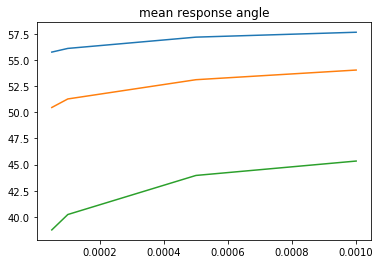

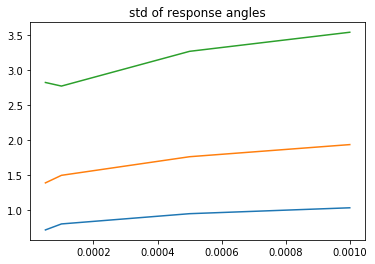

In [13]:
plt.figure()
plt.plot(dt_vals, mean_resp_angle.T)
plt.title('mean response angle')

plt.figure()
plt.plot(dt_vals, np.sqrt(var_resp_angle.T))
plt.title('std of response angles')

In [14]:
std_factor = 1/(params['exc_scale']*1e-11*params['m']*(params['r_m'] - params['rho_scale']))
estimated_std = params['noise_std_exc'] * std_factor
estimated_std

6.666666666666667

In [18]:
0.002*std_factor

6.666666666666667

## Using constant thresholds but sampled from a normal distribution across trials:

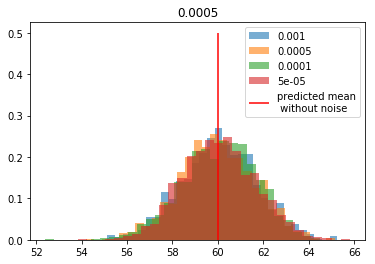

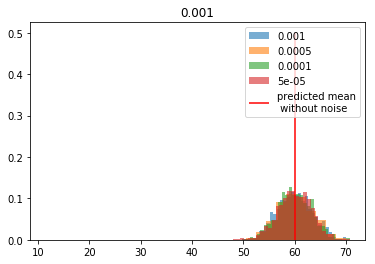

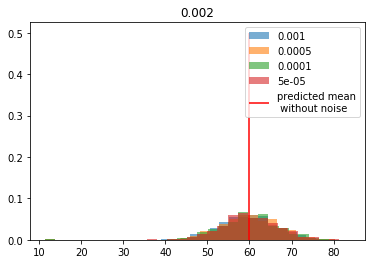

In [7]:
params = {'tau_m': 0.023,
          'e_l': -0.079,
          'r_m': 10*1e6,
          'v_t': -0.061,
          'init_vm_std': 0.000,
          'vt_std': 0.000,
          'rho_null': 0,
          'rho_null_std': 1,
          'tau_inh': 0.001,
          'rho_scale': 9.0*1e6,
          'exc_scale': 30,
          'dt': 0.001,
          'total_time': 5,
          'init_period': 0,
          'noise_std_exc': 0*1e-3,
          'noise_std_inh': 0*1e-3,
          'cutoff_angle': 180,
          'm': 1,
          'b': 0,
          'lv_min': 0.1,
          'lv_max': 1.2,
          'l_min': 10,
          'l_max': 25,
          'init_distance': 50}

std_vals = [0.0005, 0.001, 0.002]
dt_vals = [0.001, 0.0005, 0.0001, 0.00005]
mean_resp_angle = np.zeros((len(std_vals), len(dt_vals)))
for vt_idx, vt_std in enumerate(std_vals):
    plt.figure()
    for dt_idx, dt_val in enumerate(dt_vals):
        params['dt'] = dt_val
        nruns = 1000
        rstims = np.zeros(nruns)
        rdists = np.zeros(nruns)
        reaction_times = np.zeros(nruns)
        speeds = np.zeros(nruns)
        run_vt_vals = np.random.normal(loc=-0.061, scale=vt_std, size=nruns)
        for i in np.arange(nruns):
            params['v_t'] = run_vt_vals[i]
            rstims[i], rdists[i], reaction_times[i], lv, stim_size, speeds[i], resp_in_t_to_coll = md.calc_response_fully_stationary(params)

        analytical_resp_angle = stationary_response_angle(-0.061, params['e_l'], params['r_m'], params['rho_null']*1e-3,
                                                           params['exc_scale']*1e-11, params['rho_scale'], params['m'],
                                                           params['b'])
        mean_resp_angle[vt_idx, dt_idx] = np.mean(rstims)

        plt.hist(rstims, bins=30, label=str(dt_val), density=True, alpha=0.6)
    
    plt.vlines(analytical_resp_angle, 0, 0.5, 'r', label='predicted mean\n without noise')
    plt.title(str(vt_std))
    plt.legend()

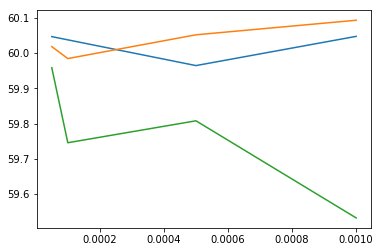

In [8]:
plt.plot(dt_vals, mean_resp_angle.T)